# Predicting Sleep Disorders with Machine Learning

In this project, I'll analyze a dataset encompassing sleep patterns, lifestyle factors, and health indicators. Using this data, I'll build a model to predict the occurrence of sleep disorders, like insomnia and sleep apnea.

## 1. Problem Definition

 > Build a model to predict sleep disorders (None, Insomnia, Sleep Apnea) based on lifestyle factors. Use data analysis to understand how different aspects of sleep health relate to the occurrence of sleep disorders and offer potential solutions for better sleep.

## 2. Data

There is a version of this dataset in Kaggle.
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

## 3. Evaluation

  >If a model can reach 95% accuracy in predicting sleep disorders (None, Insomnia, Sleep Apnea) based on lifestyle factors during the proof of concept, the project will be considered successful.

## 4. Features

The dataset contains the following features:

 * Person ID: An identifier for each individual.
 * Gender: The gender of the person (Male/Female).
 * Age: The age of the person in years.
 * Occupation: The occupation or profession of the person.
 * Sleep Duration (hours): The number of hours the person sleeps per day.
 * Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
 * Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
 * Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
 * BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
 * Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over        diastolic   pressure.
 * Heart Rate (bpm): The resting heart rate of the person in beats per minute.
 * Daily Steps: The number of steps the person takes per day.
 * Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).
 
 Details about Sleep Disorder Column:

   * None: The individual does not exhibit any specific sleep disorder.
   * Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
   * Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

 
 
 

## Prepering the tools

I'm going to use Pandas, Matplotlib and NumPy for data analysis and sklearn for modeling.


In [40]:
# import all the tools we need

# Reglur EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.metrics import roc_curve, accuracy_score, f1_score, make_scorer

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

###  Data Summary
I will present a concise overview of the dataset, including key statistics and information about each feature. The data summary will provide a quick understanding of the dataset.


In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.shape

(374, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

###  Data Distribution
I will use  bar charts to visualize the distribution of Sleep Disorder in the dataset. This help me to underestand how many of each class there.



In [10]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

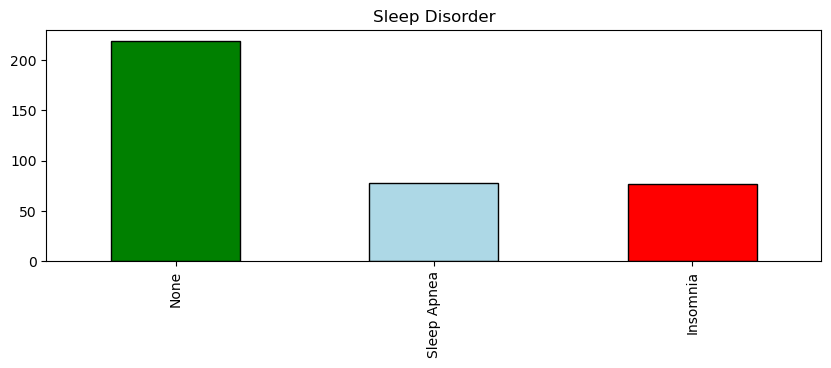

In [11]:
df['Sleep Disorder'].value_counts().plot(kind='bar',
                                         color=['green','lightblue','red'],
                                         edgecolor='black',
                                         figsize=(10,3));
plt.title('Sleep Disorder');

   **Details about Sleep Disorder**

   * None: The individual does not exhibit any specific sleep disorder.
   * Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
   * Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


 ### Explore the distribution of continuous features using histograms. 
 
   I will use histograms to show how data is spread and shaped for each continuous feature in the dataset. This analysis will help me understand patterns, central tendency, and potential outliers easily, guiding my data processing and decision-making.
 

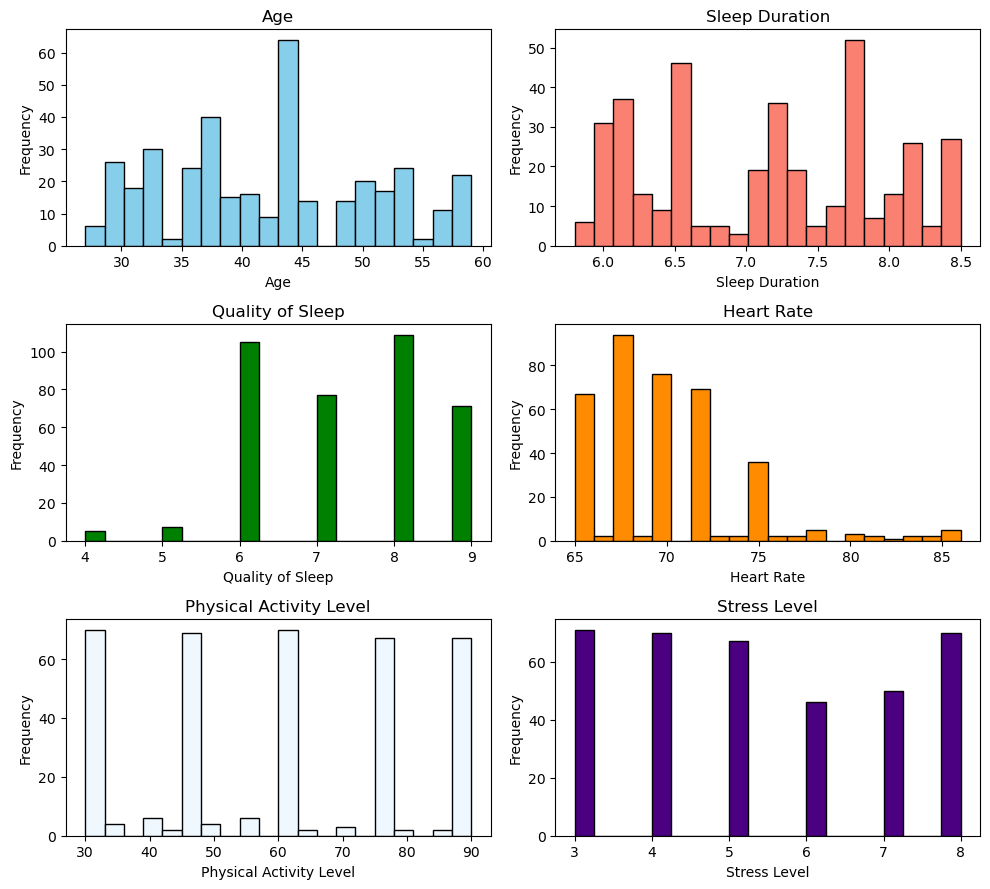

In [12]:
# List of column names for histograms
columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate', 'Physical Activity Level', 'Stress Level']

# List of colors for the histograms
colors = ['skyblue', 'salmon', 'green', 'darkorange', 'aliceblue', 'indigo']

# Create a new figure with appropriate figsize
plt.figure(figsize=(10, 9))

# Loop to create subplots
for i, (column, color) in enumerate(zip(columns, colors), 1):
    plt.subplot(3, 2, i)
    plt.hist(df[column], bins=20, color=color, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(column)

plt.tight_layout();

### Fequency of  Gender, BMI and Occupation

I will analyze and show the frequency of individuals based on their gender, BMI category, and occupation using bar charts. By plotting these charts, I can visually see the number of occurrences for each category, providing valuable insights into the distribution of gender, BMI, and occupation groups in the dataset.

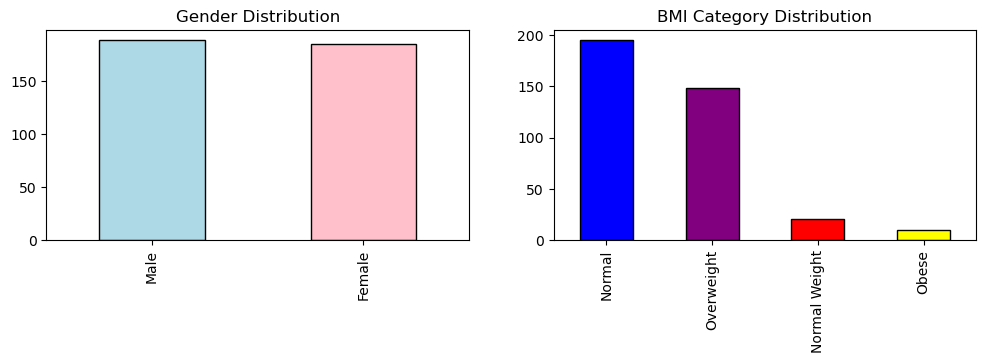

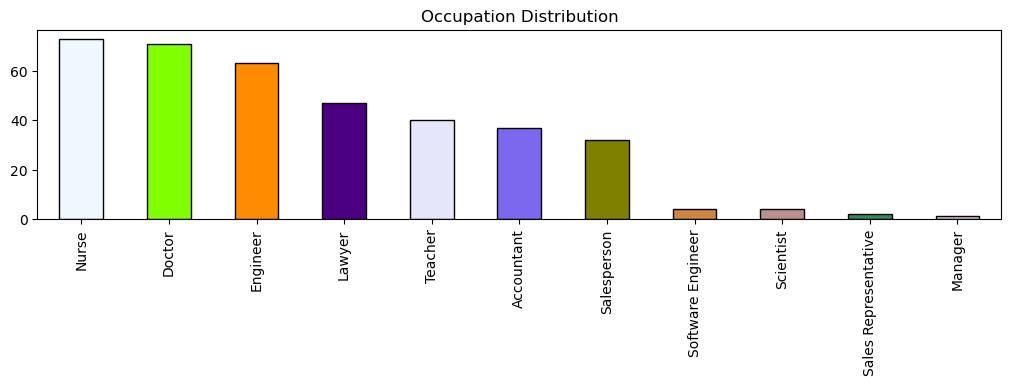

In [13]:
# Plot a bar categorical features
fig = plt.figure(figsize=(12, 6))
                 
                 
# Create the first subplot for "Gender"
ax1 = fig.add_subplot(2, 2, 1)
df['Gender'].value_counts().plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black', ax=ax1)
ax1.set_title('Gender Distribution')

# Create the second subplot for "BMI Category"
ax2 = fig.add_subplot(2, 2, 2)
df['BMI Category'].value_counts().plot(kind='bar', edgecolor='black', ax=ax2, color=['blue','purple','red','yellow'])
ax2.set_title('BMI Category Distribution')

# create the third subplot for "Occupation"
fig = plt.figure(figsize=(20, 6))

ax3 = fig.add_subplot(2, 2, 3)
df['Occupation'].value_counts().plot(kind='bar', edgecolor='black', ax=ax3 , color=['aliceblue', 'chartreuse', 'darkorange',
                                                                                    'indigo', 'lavender', 'mediumslateblue',
                                                                                    'olive', 'peru', 'rosybrown', 'seagreen',
                                                                                    'thistle'])

ax3.set_title('Occupation Distribution')
plt.tight_layout();


   **Details about BMI category**
 
   * Underweight: BMI less than 18.5
   *  Normal: BMI between 18.5 and 24.9
   * Overweight: BMI between 25.0 and 29.9
   * Obese: BMI equal to or greater than 30.0

### Sleep Disorder Frequency according to Gender, BMI, Occupation

I will investigate how sleep disorders are distributed across different categories of gender, BMI, and occupation. By creating bar charts for each combination of sleep disorders (None, Insomnia, Sleep Apnea) and the respective categories, I can visually observe the occurrence of sleep disorders within each group. This analysis will help me understand if certain gender, BMI, or occupation categories have a higher prevalence of specific sleep disorders, enabling me to identify potential associations between sleep health and demographic or lifestyle factors.

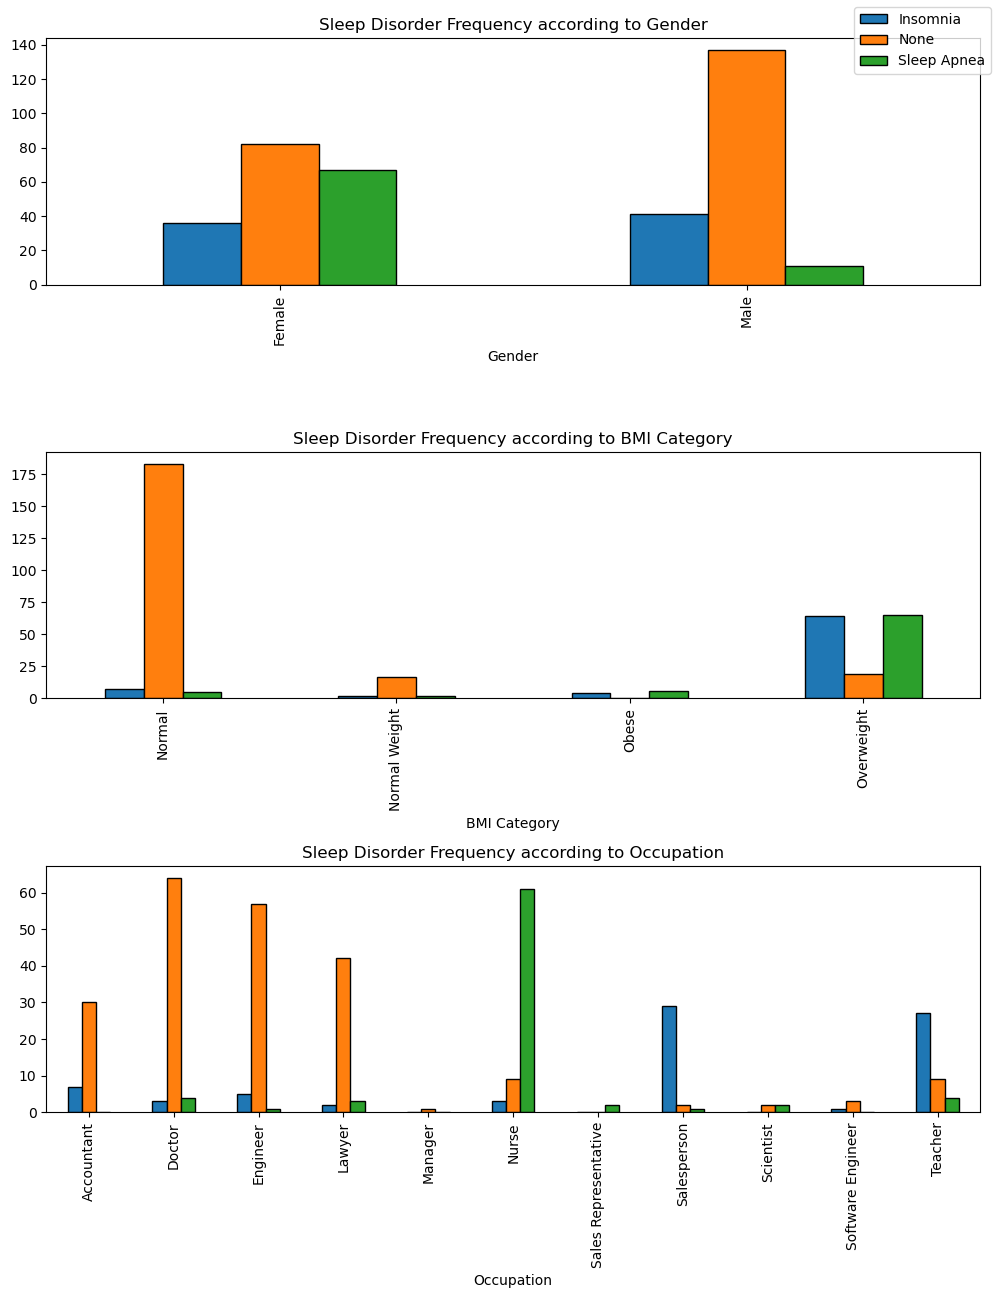

In [14]:
fig = plt.figure(figsize=(10, 13))

columns = ['Gender','BMI Category','Occupation']
count = 1

for column in columns:
    ax1 = fig.add_subplot(3, 1, count)
    pd.crosstab(df[column], df['Sleep Disorder']).plot(kind='bar',
                                                       edgecolor='black',
                                                       ax=ax1,
                                                       legend=False)
    ax1.set_title(f'Sleep Disorder Frequency according to {column}')
    count += 1

# Get the handles and labels from the first subplot
handles, labels = ax1.get_legend_handles_labels()

# Create the shared legend using the handles and labels from the first subplot
fig.legend(handles, labels, loc='upper right')
plt.tight_layout();


### Correlation Matrix

The correlation matrix shows how different variables in the dataset are related. By visualizing it with a heatmap, I can identify strong correlations and use these insights to select relevant features for the classification model.

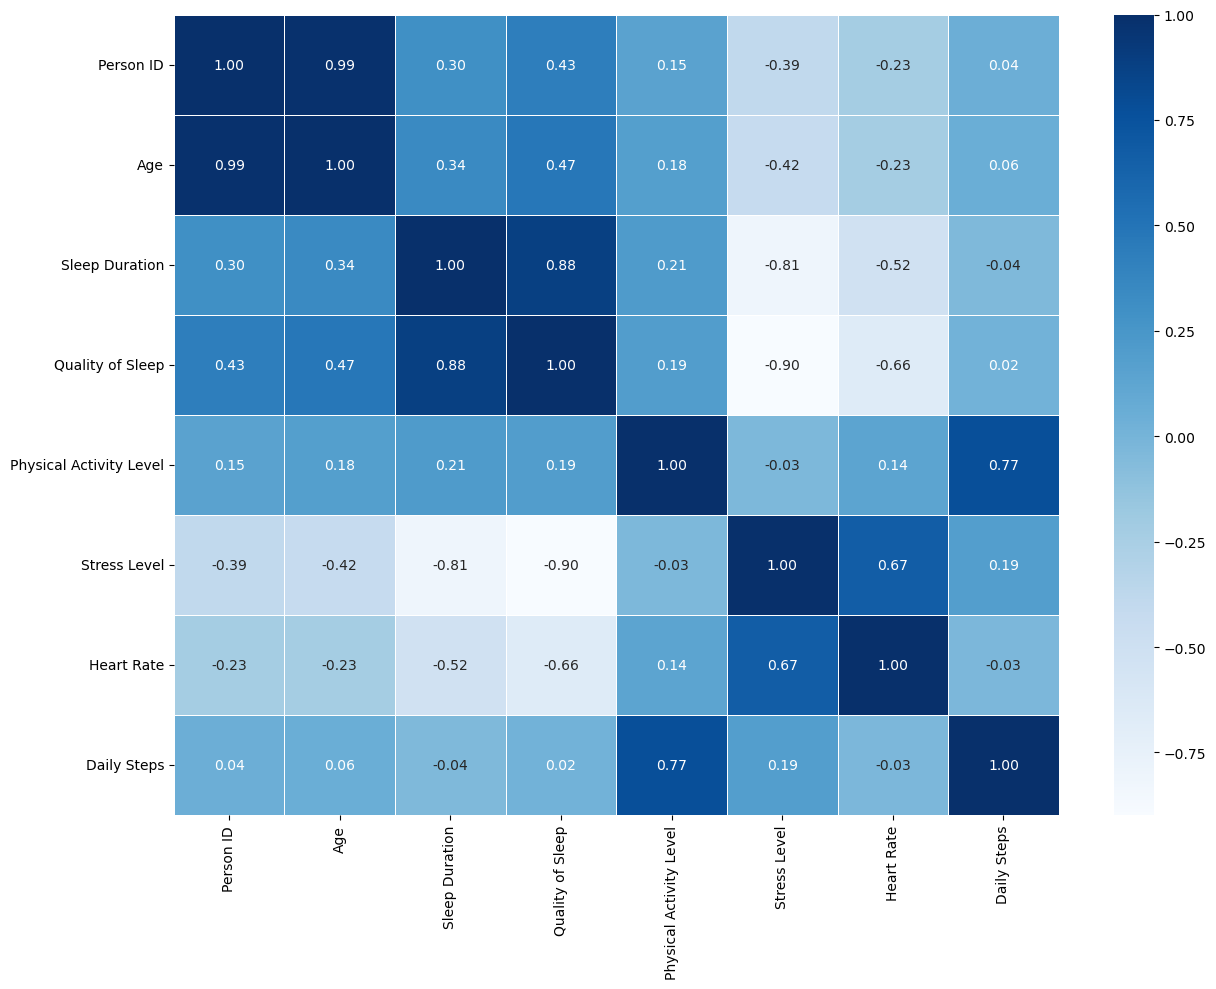

In [15]:
# Make correlation matrix a little prettier
corr_matrix = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(13,10))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")
plt.tight_layout();


Each entry in the matrix represents the correlation between two variables, indicating the strength and direction of their linear relationship. The correlation coefficient ranges from -1 to 1:

   * If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

   * If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.

   * If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the variables.


## 6. Modelling

Here are the steps I'll take in the "Modelling" stage:

   1. Choose algorithms.
   2. Set hyperparameters.
   3. Split data for training and testing.
   4. Train the models.
   5. Evaluate performance.
   6. Fine-tune models if needed.
   7. Select the best model.
   8. Finalize the chosen model.
   9.Test the model on new data.
   10. Make predictions for practical use.

In [16]:
# Split the data into X and y

X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [17]:
X.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


In [18]:
y.head()

0           None
1           None
2           None
3    Sleep Apnea
4    Sleep Apnea
Name: Sleep Disorder, dtype: object

### Turn the categories into numbers 

In [19]:
# Turn the categories into numbers 
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Gender","Occupation","BMI Category","Blood Pressure"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [20]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((299, 50), (75, 50))

In [22]:
y_train.shape, y_test.shape

((299,), (75,))

**I'm going to try 3 diffirent machine learning models:**

   1. Logistic Regression
   2. K-Nearest Neighbours Classifier
   3. Random Forest Classifier



In [23]:
models = {"LogisticRegression": LogisticRegression(max_iter=10000),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassofier" : RandomForestClassifier()}

def fit_score_metrics(models, X_train, X_test, y_train, y_test):
    """
    This function trains and tests different models and returns their accuracy scores.

    Parameters:
        models (dict): A dictionary containing model names as keys and corresponding initialized model objects as values.
        X_train (array-like): Training data features.
        X_test (array-like): Testing data features.
        y_train (array-like): Training data labels.
        y_test (array-like): Testing data labels.

    Returns:
        scores (dict): A dictionary containing model names as keys and their accuracy scores on the test data as values.
    """
    # Set a random seed
    np.random.seed(42)

    # Dict of models scores
    metrics = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)

        metrics[model_name] = { "Accuracy": f"{accuracy_score(y_test, y_preds) * 100:.2f}%",
                                "Precision": precision_score(y_test, y_preds, average='macro'),
                                "Recall": recall_score(y_test, y_preds, average='macro'),
                                "F1": f1_score(y_test, y_preds, average='macro')}
        
    return  metrics


In [24]:
model_metrics = fit_score_metrics(models, X_train, X_test, y_train, y_test)
df_model_scores = pd.DataFrame.from_dict(model_metrics).T
df_model_scores

,Accuracy,Precision,Recall,F1
LogisticRegression,93.33%,0.92096,0.908915,0.914581
KNeighborsClassifier,86.67%,0.843082,0.817829,0.816995
RandomForestClassofier,89.33%,0.855472,0.833333,0.841257


   * **Accuracy:** It shows how often the model is correct in its predictions. Higher accuracy means the model is making more correct predictions overall.

   * **Precision:** It tells us how many of the positive predictions made by the model are actually correct. High precision means fewer false positive predictions.

   * **Recall:** It tells us how many of the actual positive instances the model can correctly identify. High recall means the model is good at finding positive instances.
 
   * **F1 Score:** It's a balanced metric that considers both precision and recall. It's useful when you want to have a single measure that takes into account both correct positive predictions and the ability to find positive instances.

### Model Comparison

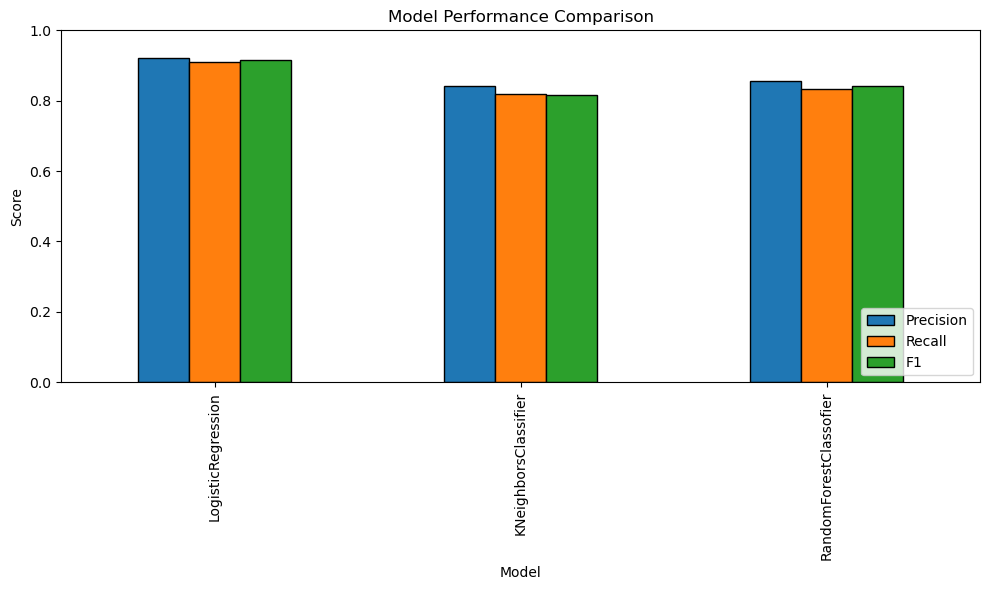

In [25]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

df_model_scores.plot(kind='bar', ax=ax, edgecolor='black')

# Customize the plot
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)  # Set the y-axis limit to show scores between 0 and 1
ax.legend(loc='lower right')

# Show the plot
plt.tight_layout();

### Hyperparameter tuning with GridSearchCV
I will use hyperparameter tuning with GridSearchCV to find the best hyperparameter settings for the Logistic Regression, K-Nearest Neighbors (KNN), and Random Forest models. This will help improve the models' performance on the dataset. After evaluating the models, I will select the best-performing one, optimizing it for better predictions on new data.

In [102]:
def tune_model(model, param):
    np.random.seed(42)
    """
    Tune hyperparameters of the given model using GridSearchCV.
    
    Parameters:
        model (estimator): The model to be tuned.
        param (dict): The dictionary containing hyperparameter grids to search.
        
    Returns:
        GridSearchCV: The fitted GridSearchCV object with the best hyperparameters.
    """
    # Setup random hyperparameter search 
    gs = GridSearchCV(model,
                      param_grid=param,
                      cv=5,
                      verbose=True) 

    # Fit random hyperparameter search model 
    return gs.fit(X_train, y_train)

In [104]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Tune logisticRegression
log_red_tuned = tune_model(LogisticRegression(), log_reg_grid)
log_red_tuned.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'C': 1.623776739188721, 'max_iter': 100, 'solver': 'liblinear'}

In [106]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid ={
    'bootstrap': [True],
    'max_depth': [80,  110],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [ 200, 300, 1000]
}
# Tune RandomForestClassifier
rf_grid_tuned = tune_model(RandomForestClassifier(), rf_grid)
rf_grid_tuned.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'bootstrap': True,
 'max_depth': 80,
 'min_samples_split': 8,
 'n_estimators': 300}

In [108]:
# Create a hyperparameter grid for  KNeighborsClassifier
knn_grid = {'n_neighbors': [3, 5, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]}

# Tune KNeighborsClassifier
knn_grid_tuned = tune_model(KNeighborsClassifier(), knn_grid)
knn_grid_tuned.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [33]:
models_tuning = {"LogisticRegression": LogisticRegression(C= 1.623776739188721, solver= 'liblinear'),
                  "KNeighborsClassifier": KNeighborsClassifier(),
                  "RandomForestClassofier" : RandomForestClassifier(bootstrap=True,max_depth= 80,
                                                                    min_samples_split= 8,
                                                                    n_estimators= 300)}

model_tuning_metrics = fit_score_metrics(models_tuning, X_train, X_test, y_train, y_test)
df_model_tuning_scores = pd.DataFrame.from_dict(model_tuning_metrics).T

**Before tuning:**

In [109]:
df_model_scores

,Accuracy,F1,Precision,Recall
Sleepwise AI,90.67%,0.876872,0.893313,0.867248


**After tuning:**

In [110]:
df_model_tuning_scores

,Accuracy,Precision,Recall,F1
LogisticRegression,90.67%,0.893313,0.867248,0.876872
KNeighborsClassifier,86.67%,0.843082,0.817829,0.816995
RandomForestClassofier,88.00%,0.857232,0.825581,0.838314


After trying hyperparameter tuning for K-Nearest Neighbors (KNN) and Random Forest, I didn't see significant improvements compared to the initial models. Logistic Regression performed better in terms of evaluation metrics. Due to computational limitations, further tuning might not have helped KNN and Random Forest. So, I'll use Logistic Regression as it provides satisfactory results without added complexity


### Hyperparameter tuning with  RandomizedSearchCV
Since LogisticRegression model provides the best scores so far, I'll try and improve them again using  RandomizedSearchCV..

In [36]:
# Tune logisticRegression

np.random.seed(42)

# Create a hyperparameter grid for logisticRegression
log_reg_grid = {
        'C': np.logspace(-4, 4, 20),  # Regularization parameter values
        'solver': ['liblinear', 'saga'],  # Solvers for optimization
        'max_iter': [100, 1000, 10000]  # Maximum number of iterations
    }

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9066666666666666

### Calculate evaluation metrics using cross-validation

I'm going to calculate accuracy, precision, recall and f1-score of model using cross-validation and to do so I'll be using 'cross_val_score()'.


In [71]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 10000, 'C': 1.623776739188721}

In [78]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [77]:
def cross_validation(clf, X, y, cv):
    """
    Perform cross-validation and calculate evaluation metrics.
    
    Parameters:
        clf (estimator): The classifier or model to be evaluated.
        X (array-like): The feature matrix.
        y (array-like): The target vector.
        cv (int or cross-validation generator): Determines the cross-validation splitting strategy.
        scoring_metrics (list): A list of scoring metrics to be used for evaluation.
        
    Returns:
        list: Mean values of the specified evaluation metrics from cross-validation.
    """
    
    # Calculate evaluation metrics using cross-validation
    accuracy = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(clf, X, y, cv=cv, scoring='precision_macro')
    recall = cross_val_score(clf, X, y, cv=cv, scoring='recall_macro')
    f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
    
    
    mean_accuracy = np.mean(accuracy)
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f1 = np.mean(f1)
    
    return [mean_accuracy, mean_precision, mean_recall, mean_f1]

### Comparison of Metrics: Improved Model vs. Baseline Model

I will compare two logistic regression models: the "Improved Model" and the "Baseline Model." The "Improved Model" has enhancements, while the "Baseline Model" is the original version. I will use metrics to see how much better the "Improved Model" performs on average. This comparison will help me understand which model is more effective overall. 

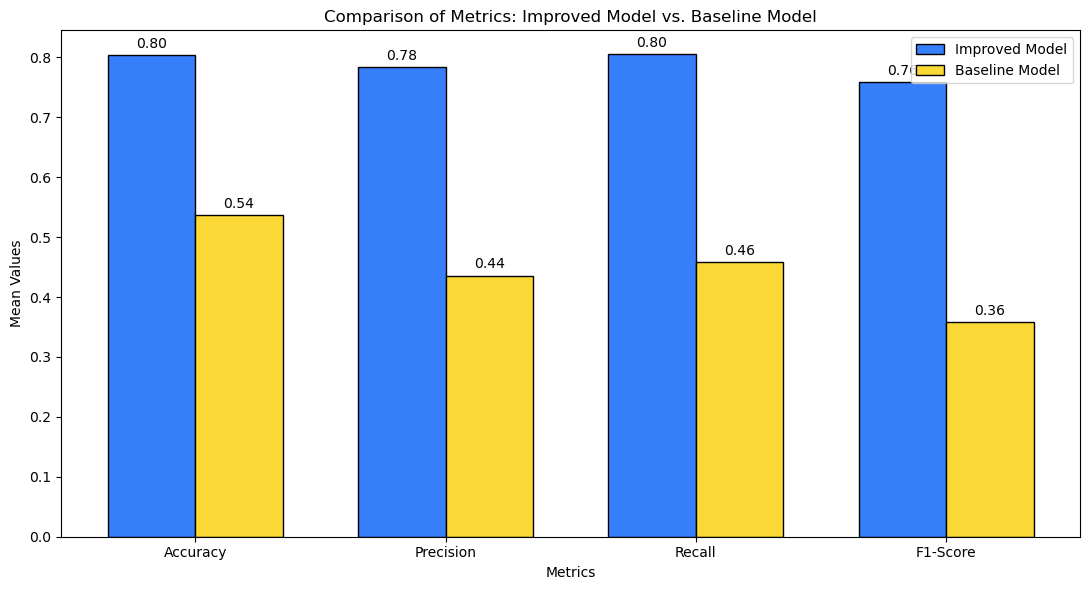

In [91]:
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create lists of mean values for both models
improved_model_means =cross_validation(LogisticRegression(C= 1.623776739188721,  solver= 'liblinear'),
                                       cv=5, X=transformed_X, y=y)

baseline_model_means = cross_validation(LogisticRegression(), cv=5, X=transformed_X, y=y)

# Set the width of the bars
bar_width = 0.35

# Create a bar plot for comparison
fig, ax = plt.subplots(figsize=(11, 6))
index = np.arange(len(metrics))

rects1 = ax.bar(index - bar_width/2, improved_model_means, bar_width, label='Improved Model',edgecolor='black',color='#377efa')
rects2 = ax.bar(index + bar_width/2, baseline_model_means, bar_width, label='Baseline Model',edgecolor='black',color='#fad937')

ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Metrics: Improved Model vs. Baseline Model')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### Feature Importance


I have a logistic regression model that predicts different health conditions.
I want to understand which features are most important for each health condition. 

In [81]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [82]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C= 1.623776739188721, max_iter= 10000, solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, max_iter=10000, solver='liblinear')

In [83]:
# Get the column names (feature names)
feature_names = df.columns.drop('Sleep Disorder')

# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Create a DataFrame to hold the coefficients and feature names
coef_df = pd.DataFrame(feature_dict, columns=feature_names, index=["Health Variable"])

# Transpose the DataFrame to have features as rows
coef_df = coef_df.T
coef_df

,Health Variable
Person ID,-0.449688
Gender,0.541425
Age,0.096919
Occupation,-0.301026
Sleep Duration,-0.293239
Quality of Sleep,0.009995
Physical Activity Level,-0.071958
Stress Level,-0.633272
BMI Category,-0.100004
Blood Pressure,0.690021


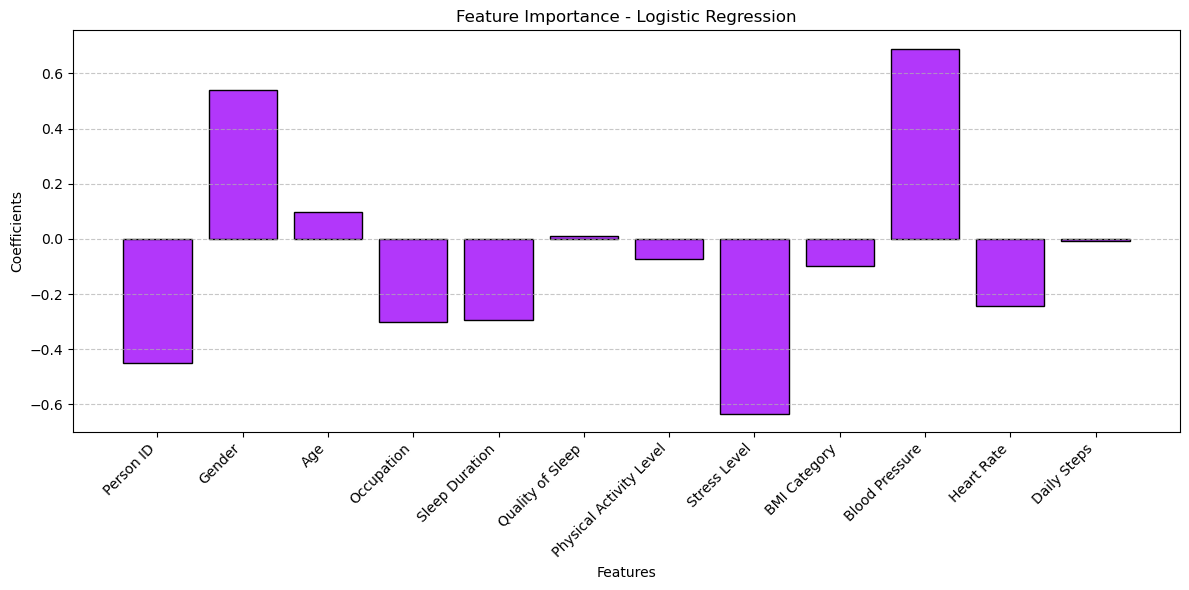

In [92]:
# Rename the columns to the class names (e.g., Class 0, Class 1, Class 2)
class_names = [f"Class {i}" for i in range(len(coef_df.columns))]
coef_df.columns = class_names

# Plot the bar chart with custom styles
plt.figure(figsize=(12, 6))


# Plot the bars for each class with different colors
for idx, class_name in enumerate(class_names):
    plt.bar(coef_df.index, coef_df[class_name], label=class_name, edgecolor='black', color='#b237fa')

# Add labels, title, and legend
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance - Logistic Regression")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout();

* Positive heights: mean the variable positively influences the prediction
* negative heights: mean a negative influence.

### Saving and loading the trained machine learning models


In [85]:
import pickle


# Save a model to a file
pickle.dump(clf, open("Sleepwise AI.pkl", "wb"))

In [86]:

# load a saved model
clf = pickle.load(open("Sleepwise AI.pkl", "rb"))

In [87]:
model = {"Sleepwise AI" : clf}
model_metrics = fit_score_metrics(model, X_train, X_test, y_train, y_test)
df_model_scores = pd.DataFrame.from_dict(model_metrics).T
df_model_scores

,Accuracy,F1,Precision,Recall
Sleepwise AI,90.67%,0.876872,0.893313,0.867248


### True vs. Predicted Labels


In [88]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
y_true = np.array(y_test)  # Replace y_test with your true labels
y_pred = clf.predict(X_test)  # Replace clf with your model name and X_test with your test data

# Create a DataFrame to display true labels and predicted labels side by side
df= pd.DataFrame({'True Labels': y_true, 'Predicted Labels': y_pred})

# Print the DataFrame
df

,True Labels,Predicted Labels
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
70,Insomnia,None
71,Insomnia,Insomnia
72,None,None
73,Sleep Apnea,Sleep Apnea


In [89]:
# Export the DataFrame to a CSV file
df.to_csv('true_vs_predicted_labels.csv', index=False)